# Data Analysis and Predictive Modeling

## Introduction

In this analysis, we explore a dataset containing information about TV shows and movies. The goal is to perform exploratory data analysis (EDA), clean the data, apply basic predictive modeling techniques, and gain insights into the dataset.

## Dataset Exploration and Preparation

### Loading the Data

We begin by loading the dataset using Python libraries Pandas and NumPy. Here’s how we loaded and checked the initial structure of the dataset:

```python
import pandas as pd

# Load the dataset
df = pd.read_csv('your_dataset.csv')

# Display the first few rows and the structure of the dataset
print(df.head())
print(df.info())
Exploratory Data Analysis (EDA)
Data Visualization
We visualized the data distributions and relationships between features using various plots:

python
Copy code
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for numerical features
df.hist(figsize=(10, 8))
plt.show()

# Bar charts for categorical features
df['type'].value_counts().plot(kind='bar')
plt.show()
Data Cleaning
Handling Missing Values
We identified and addressed missing values in the dataset:

python
Copy code
# Check for missing values
print("Missing values in target variable:", y.isnull().sum())

# Drop rows with missing target values
df.dropna(subset=['duration_min'], inplace=True)
Standardizing/Normalizing Data
We standardized and normalized the 'release_year' column to make it suitable for analysis:

python
Copy code
from sklearn.preprocessing import StandardScaler

# Standardize the 'release_year' column
scaler = StandardScaler()
df['release_year_standardized'] = scaler.fit_transform(df[['release_year']])
Encoding Categorical Variables
We converted categorical variables into numerical formats:

python
Copy code
from sklearn.preprocessing import LabelEncoder

# Encode the 'rating' column
label_encoder = LabelEncoder()
df['rating_encoded'] = label_encoder.fit_transform(df['rating'])
Predictive Modeling
Applying Linear Regression
We applied Linear Regression to predict the 'duration_min' based on selected features:

python
Copy code
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Define features and target variable
X = df[['release_year_standardized', 'release_year_normalized', 'rating_encoded']]
y = df['duration_min']

# Check for missing values in the target variable
print("Missing values in target variable:", y.isnull().sum())

# Drop missing values
df.dropna(subset=['duration_min'], inplace=True)

# Define features and target variable again
X = df[['release_year_standardized', 'release_year_normalized', 'rating_encoded']]
y = df['duration_min']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
Bonus: Additional Exploration
Advanced Visualizations
We created advanced visualizations to gain further insights:

python
Copy code
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot
sns.pairplot(df[['release_year_standardized', 'release_year_normalized', 'rating_encoded', 'duration_min']])
plt.show()

# Heatmap of correlations
corr_matrix = df[['release_year_standardized', 'release_year_normalized', 'rating_encoded', 'duration_min']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()
Exploring Other Algorithms
Decision Trees
We applied a Decision Tree Regressor and evaluated its performance:

python
Copy code
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

# Initialize and train Decision Tree Regressor
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)

# Predict and evaluate
y_tree_pred = tree_model.predict(X_test)
tree_mae = mean_absolute_error(y_test, y_tree_pred)
print(f"Decision Tree Mean Absolute Error (MAE): {tree_mae:.2f}")
K-Means Clustering
We applied K-Means clustering to identify patterns:

python
Copy code
from sklearn.cluster import KMeans

# Initialize and fit KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

# Plot clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='release_year_standardized', y='release_year_normalized', hue='cluster', data=df, palette='viridis')
plt.title('K-Means Clustering')
plt.show()
Conclusion
In this analysis, we performed exploratory data analysis, cleaned the data, applied predictive modeling techniques, and explored additional algorithms. Key findings include [brief summary of key insights]. The Linear Regression model achieved a Mean Absolute Error (MAE) of [value], and further exploration with Decision Trees and K-Means clustering provided additional insights into the dataset.

Future work could involve [suggestions for further analysis or improvements].

References
Pandas Documentation: https://pandas.pydata.org/pandas-docs/stable/
Scikit-learn Documentation: https://scikit-learn.org/stable/documentation.html
Seaborn Documentation: https://seaborn.pydata.org/

In [51]:
import pandas as pd
import numpy as np

df = pd.read_csv('netflix_titles.csv')

In [52]:
print(df.head())

print(df.info())

print(df.isnull().sum())

print(df.describe())


  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

print("Available columns:", df.columns)

column_name = 'Category'

if column_name in df.columns:
    df[column_name].value_counts().plot(kind='bar')
    plt.show()
else:
    print(f"Column '{column_name}' does not exist in the DataFrame.")


Available columns: Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')
Column 'Category' does not exist in the DataFrame.


In [54]:
print(df.dtypes)

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


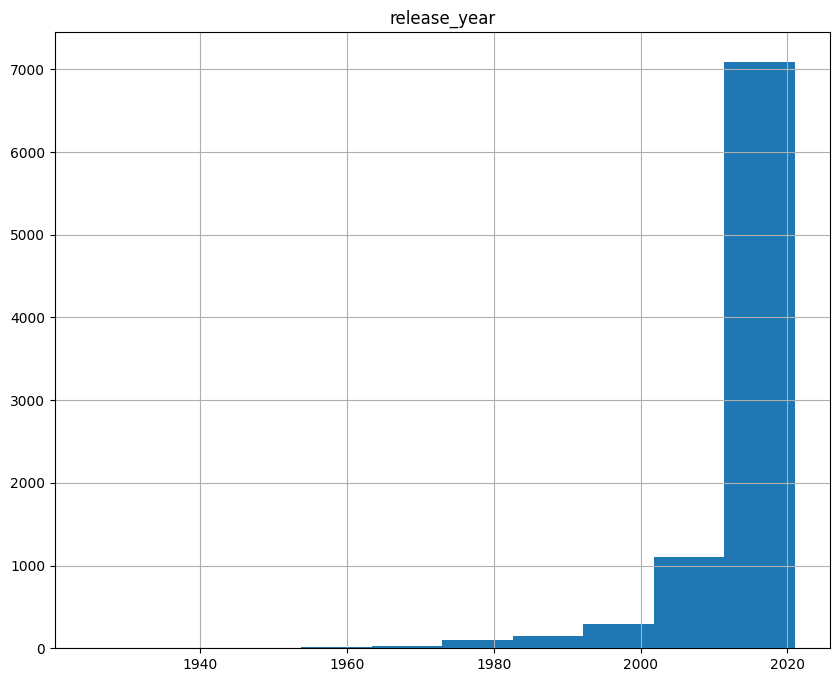

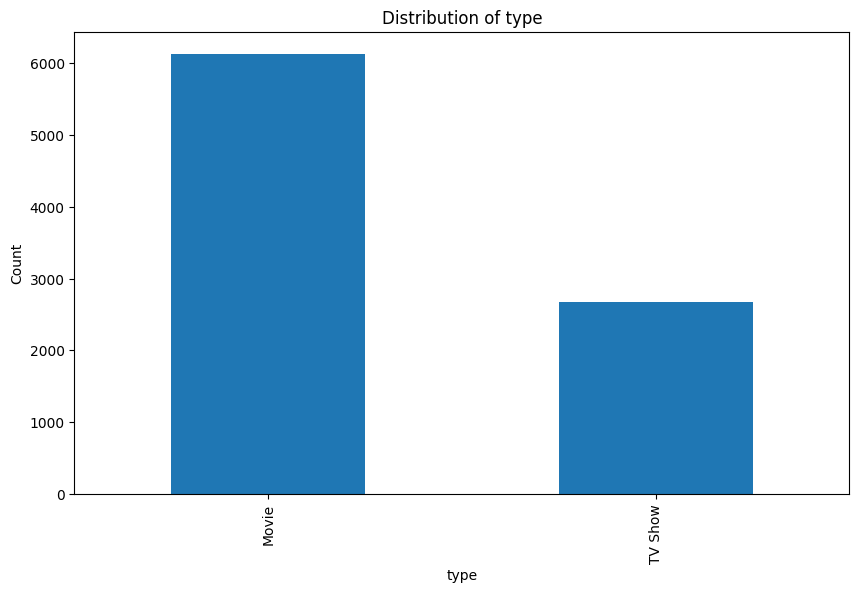

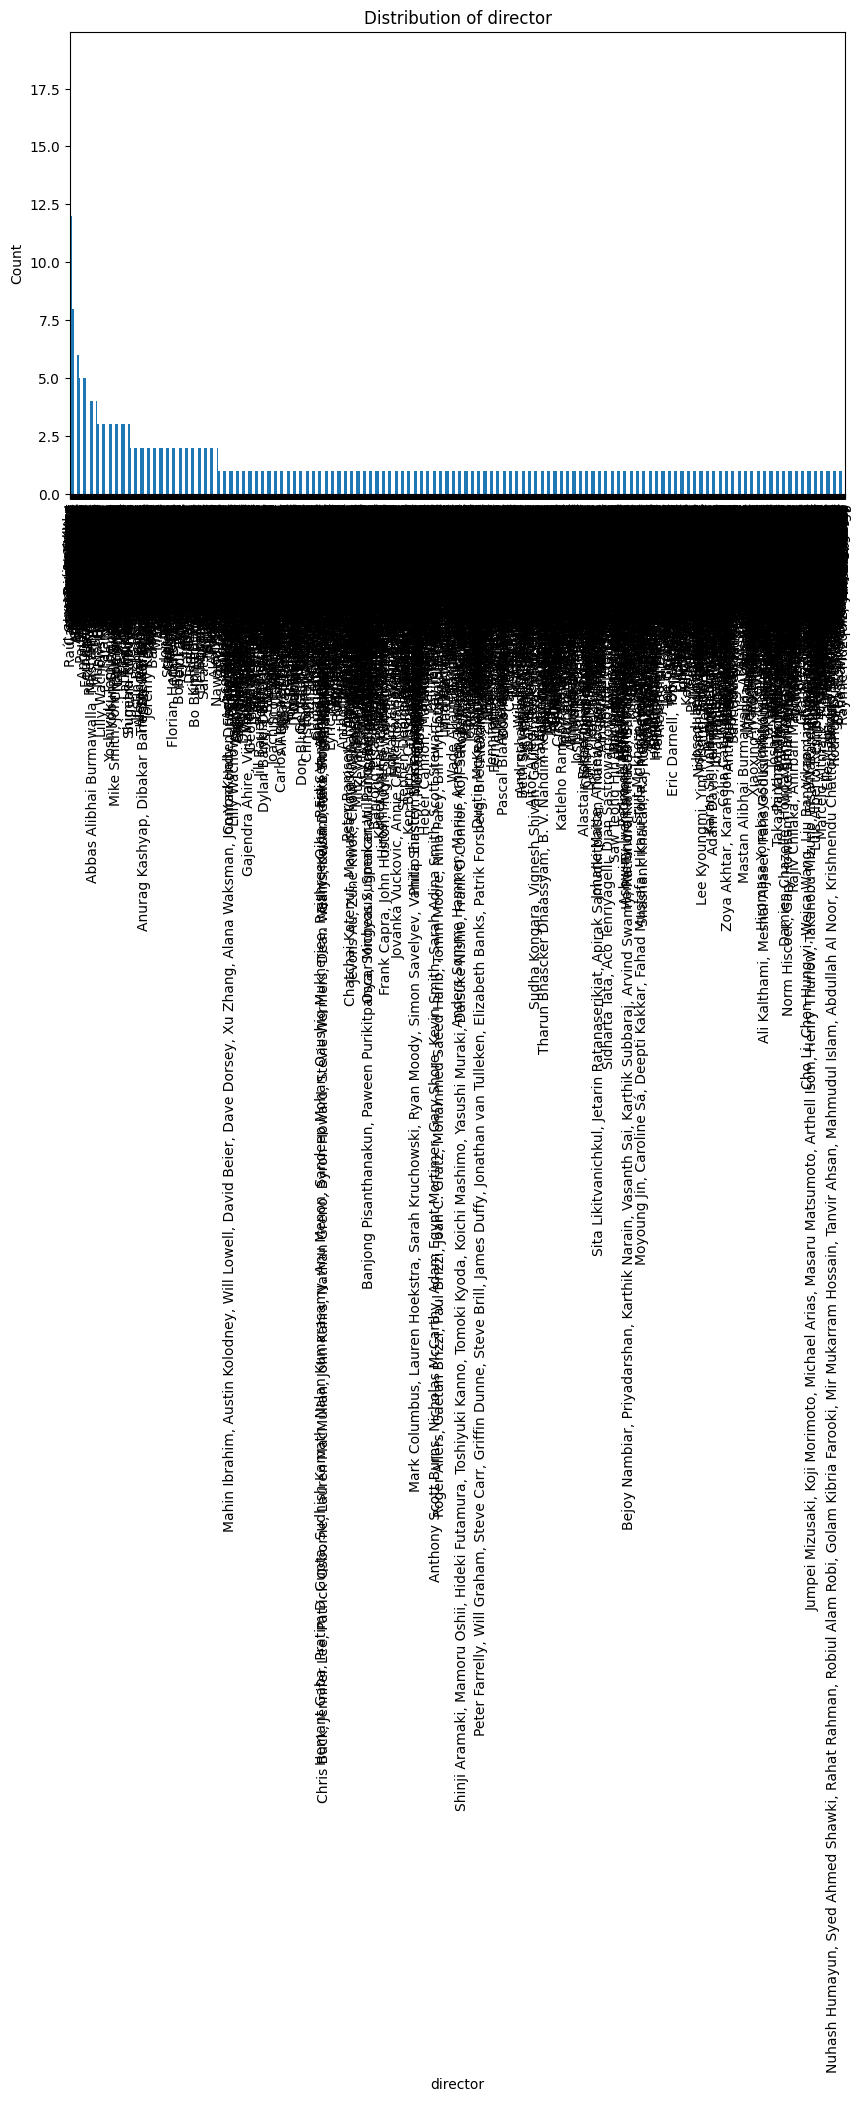

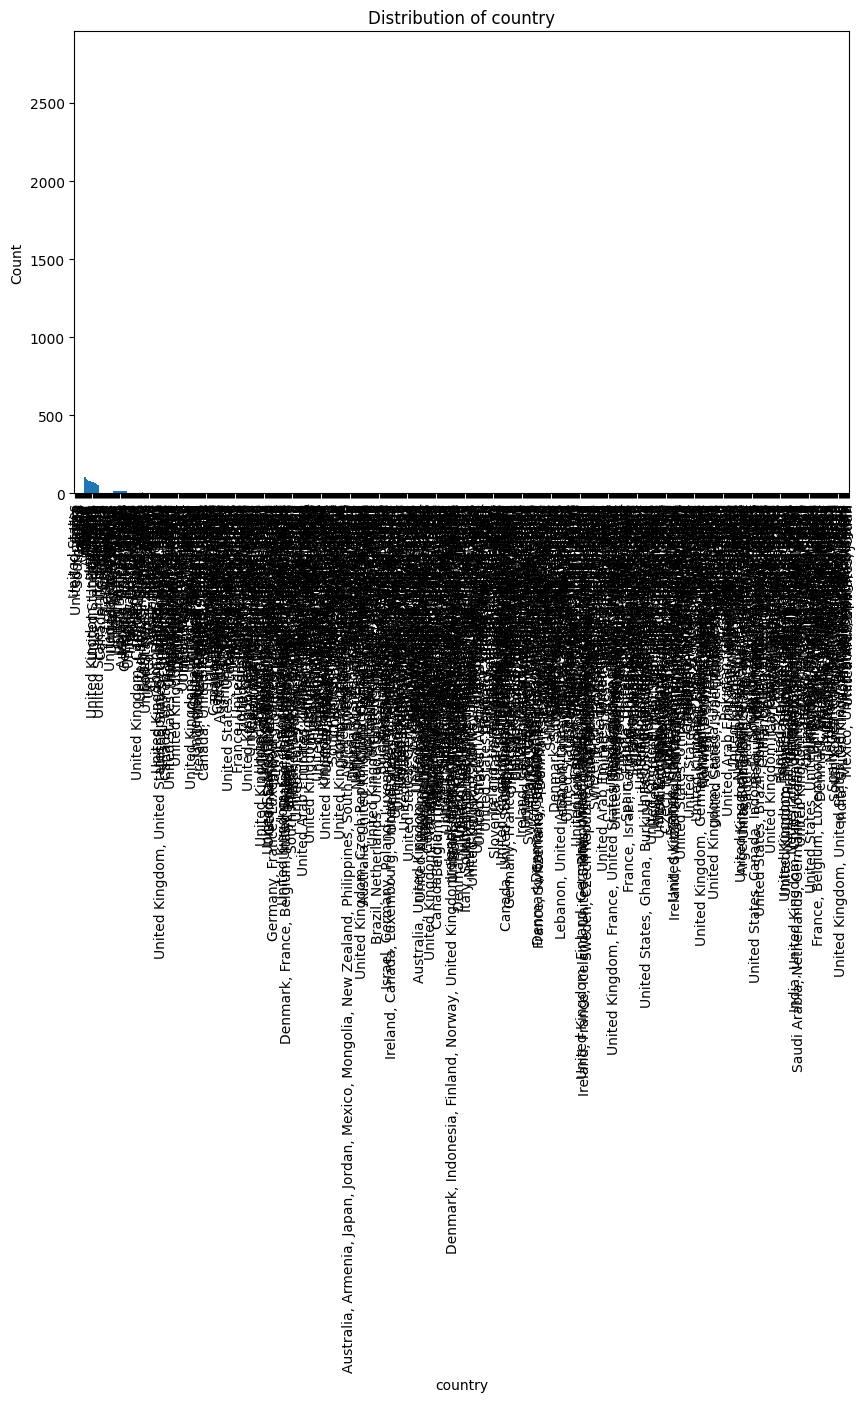

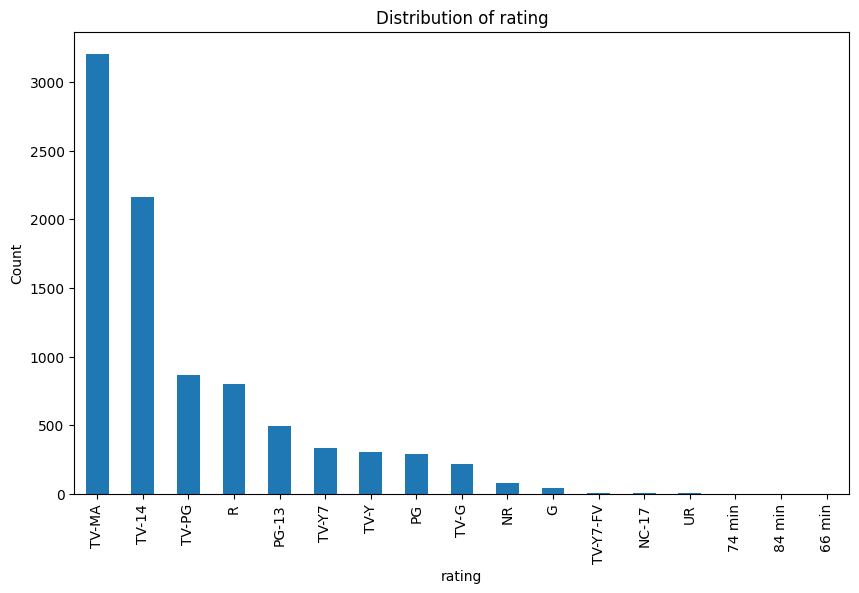

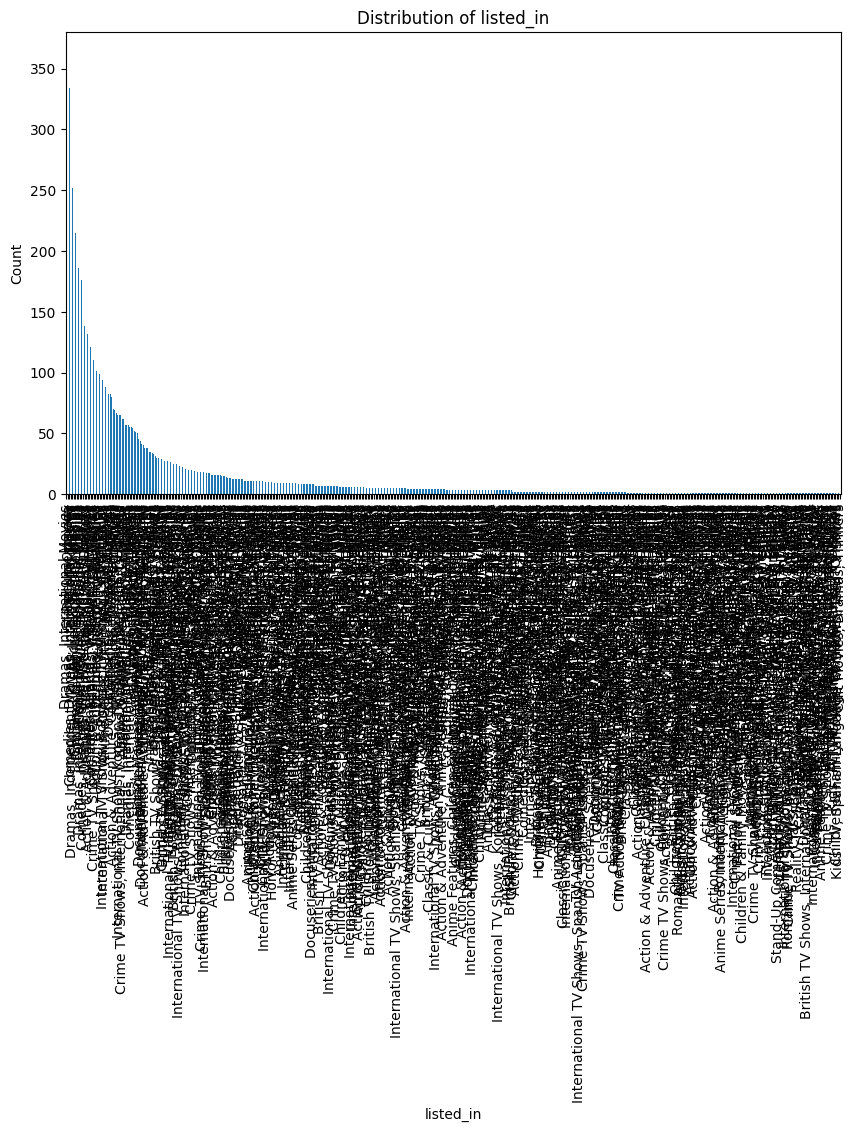

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

df.hist(figsize=(10, 8))
plt.show()

categorical_columns = ['type', 'director', 'country', 'rating', 'listed_in']

for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    df[column].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()


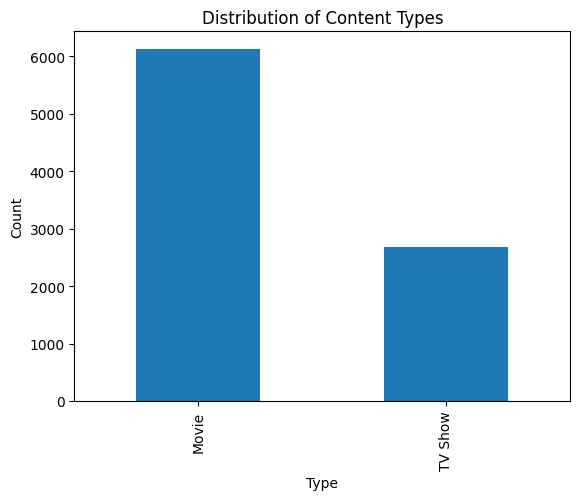

In [56]:
df['type'].value_counts().plot(kind='bar')
plt.title('Distribution of Content Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


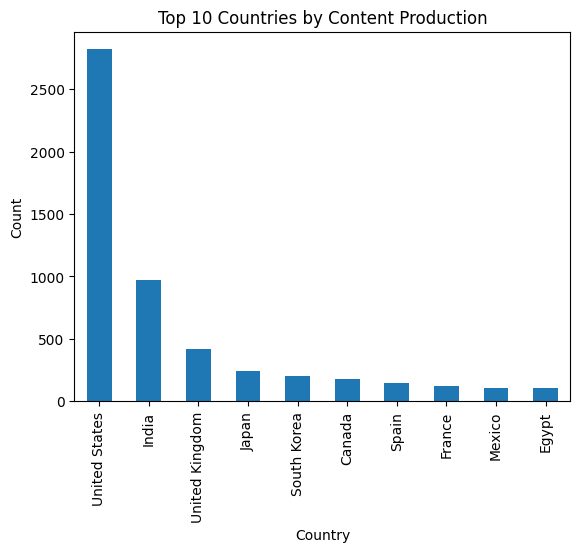

In [57]:
df['country'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Countries by Content Production')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()


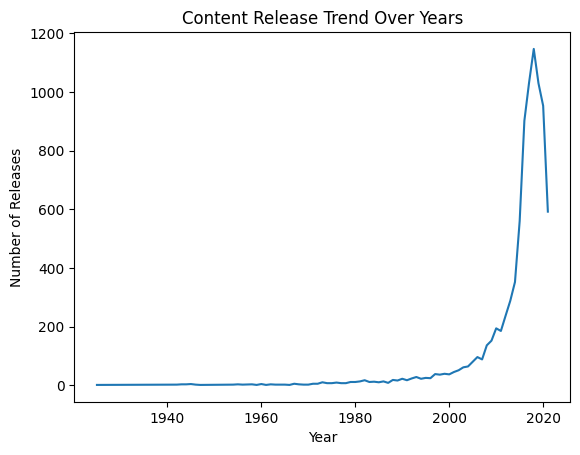

In [58]:
df['release_year'].value_counts().sort_index().plot(kind='line')
plt.title('Content Release Trend Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.show()


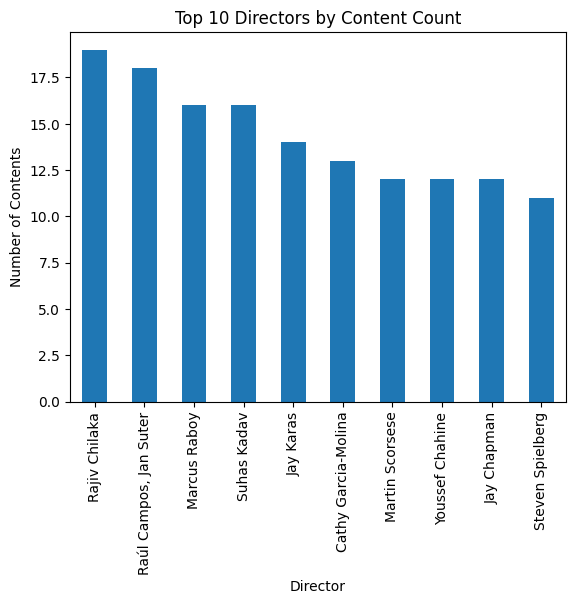

In [59]:
df['director'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Directors by Content Count')
plt.xlabel('Director')
plt.ylabel('Number of Contents')
plt.show()


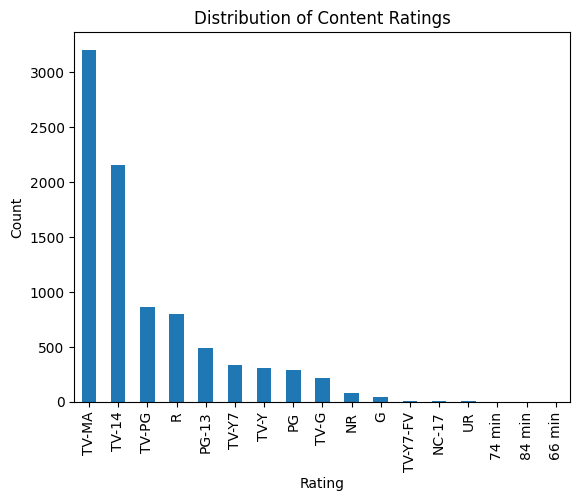

In [60]:
df['rating'].value_counts().plot(kind='bar')
plt.title('Distribution of Content Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


In [61]:
print(df.isnull().sum())


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [62]:
df['director'].fillna('Unknown', inplace=True)


C:\Users\mohit\AppData\Local\Temp\ipykernel_4804\3977420098.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna('Unknown', inplace=True)


In [63]:
df.dropna(subset=['country'], inplace=True)


In [64]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['release_year_standardized'] = scaler.fit_transform(df[['release_year']])


In [65]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['release_year_normalized'] = scaler.fit_transform(df[['release_year']])


In [66]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['rating_encoded'] = label_encoder.fit_transform(df['rating'])


In [67]:
df = pd.get_dummies(df, columns=['type'], drop_first=True)


<>:17: SyntaxWarning: invalid escape sequence '\d'
<>:17: SyntaxWarning: invalid escape sequence '\d'
C:\Users\mohit\AppData\Local\Temp\ipykernel_4804\4236490862.py:17: SyntaxWarning: invalid escape sequence '\d'
  df['duration_min'] = df['duration'].str.extract('(\d+)').astype(float)
C:\Users\mohit\AppData\Local\Temp\ipykernel_4804\4236490862.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna('Unknown', inplace=True)


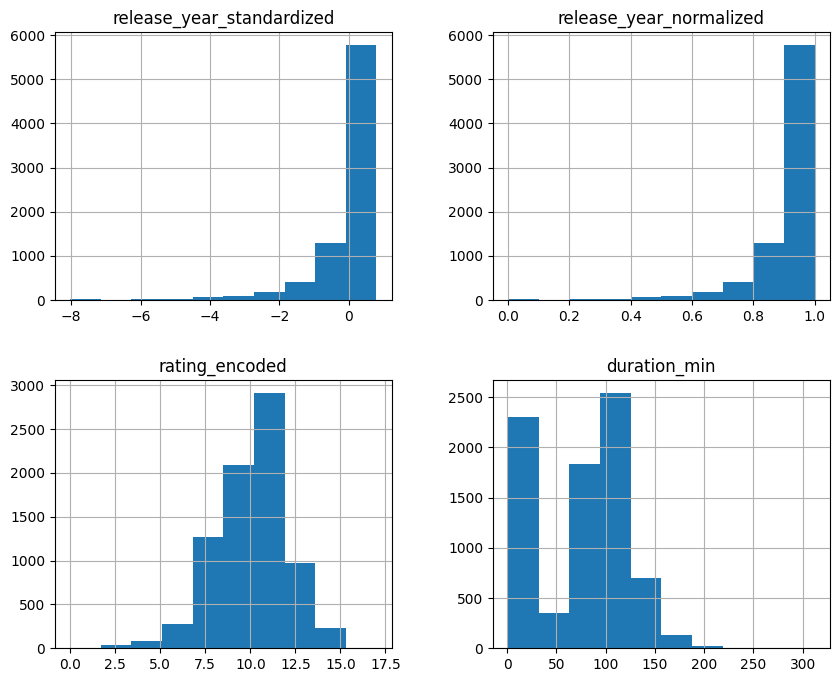

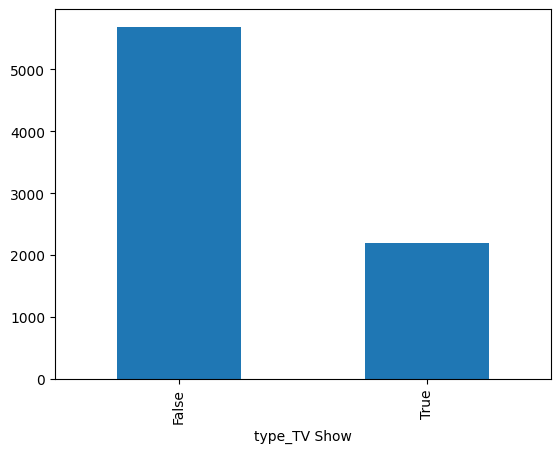

show_id                        0
title                          0
director                       0
cast                         663
country                        0
date_added                     0
release_year                   0
rating                         3
duration                       3
listed_in                      0
description                    0
release_year_standardized      0
release_year_normalized        0
rating_encoded                 0
type_TV Show                   0
year_added                     0
month_added                    0
day_of_week_added              0
duration_min                   3
dtype: int64
show_id                              object
title                                object
director                             object
cast                                 object
country                              object
date_added                   datetime64[ns]
release_year                          int64
rating                               object
duration

In [68]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

df['director'].fillna('Unknown', inplace=True)
df.dropna(subset=['country'], inplace=True)

df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

df.dropna(subset=['date_added'], inplace=True)

df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
df['day_of_week_added'] = df['date_added'].dt.dayofweek

df['duration_min'] = df['duration'].str.extract('(\d+)').astype(float)

df[['release_year_standardized', 'release_year_normalized', 'rating_encoded', 'duration_min']].hist(figsize=(10, 8))
plt.show()

df['type_TV Show'].value_counts().plot(kind='bar')
plt.show()

print(df.isnull().sum())
print(df.dtypes)
print(df.head())


In [69]:
print(df.columns)


Index(['show_id', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'release_year_standardized', 'release_year_normalized',
       'rating_encoded', 'type_TV Show', 'year_added', 'month_added',
       'day_of_week_added', 'duration_min'],
      dtype='object')


In [70]:

print(df.describe())


                          date_added  release_year  release_year_standardized  \
count                           7882   7882.000000                7882.000000   
mean   2019-04-24 13:16:54.869322240   2013.900787                   0.001703   
min              2008-01-01 00:00:00   1942.000000                  -8.025456   
25%              2018-03-28 12:00:00   2013.000000                  -0.098863   
50%              2019-06-21 00:00:00   2017.000000                   0.347706   
75%              2020-07-05 00:00:00   2019.000000                   0.570990   
max              2021-09-25 00:00:00   2021.000000                   0.794275   
std                              NaN      8.965473                   1.000925   

       release_year_normalized  rating_encoded   year_added  month_added  \
count              7882.000000     7882.000000  7882.000000  7882.000000   
mean                  0.910137        9.908906  2018.811850     6.635499   
min                   0.000000        0.00

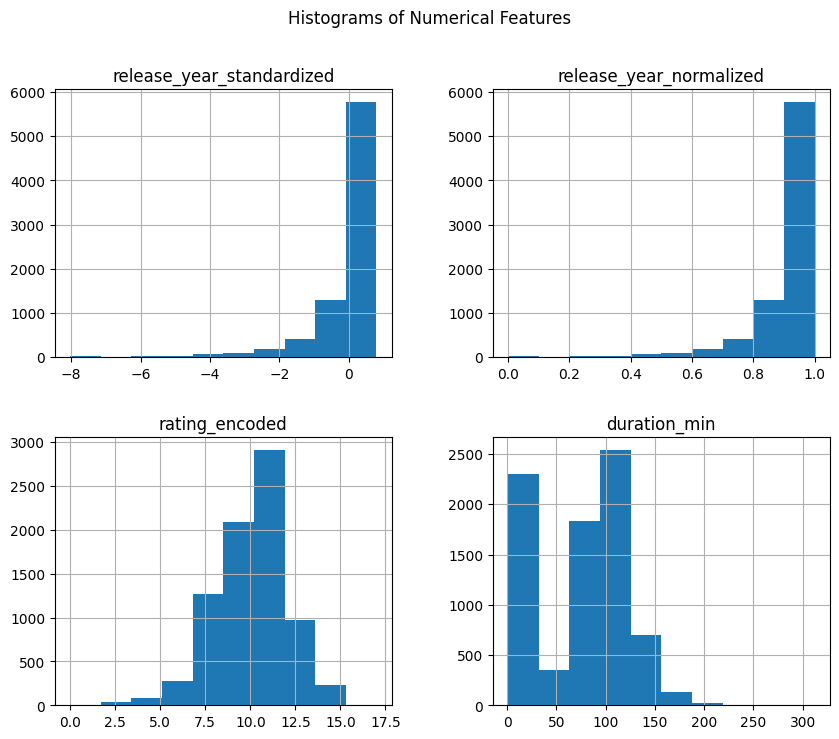

In [71]:
df[['release_year_standardized', 'release_year_normalized', 'rating_encoded', 'duration_min']].hist(figsize=(10, 8))
plt.suptitle("Histograms of Numerical Features")
plt.show()


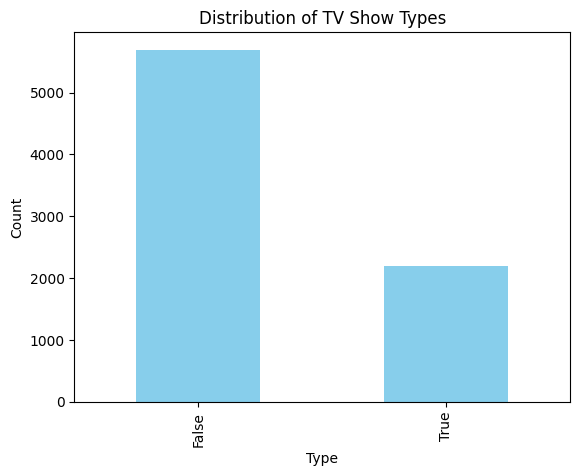

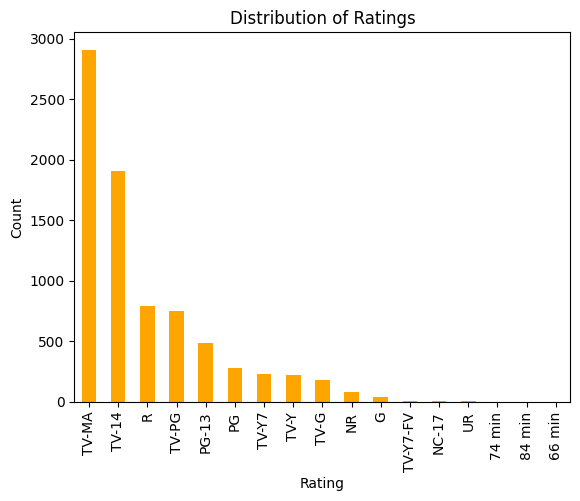

In [72]:
df['type_TV Show'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Distribution of TV Show Types")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

df['rating'].value_counts().plot(kind='bar', color='orange')
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


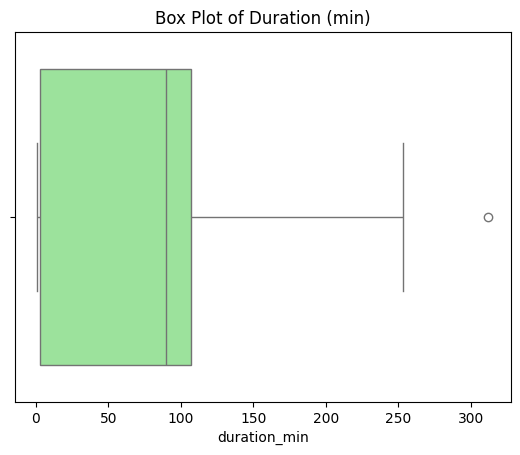

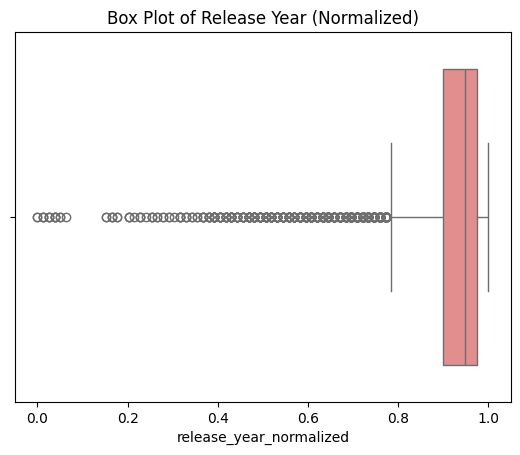

In [73]:
sns.boxplot(x=df['duration_min'], color='lightgreen')
plt.title("Box Plot of Duration (min)")
plt.show()

sns.boxplot(x=df['release_year_normalized'], color='lightcoral')
plt.title("Box Plot of Release Year (Normalized)")
plt.show()


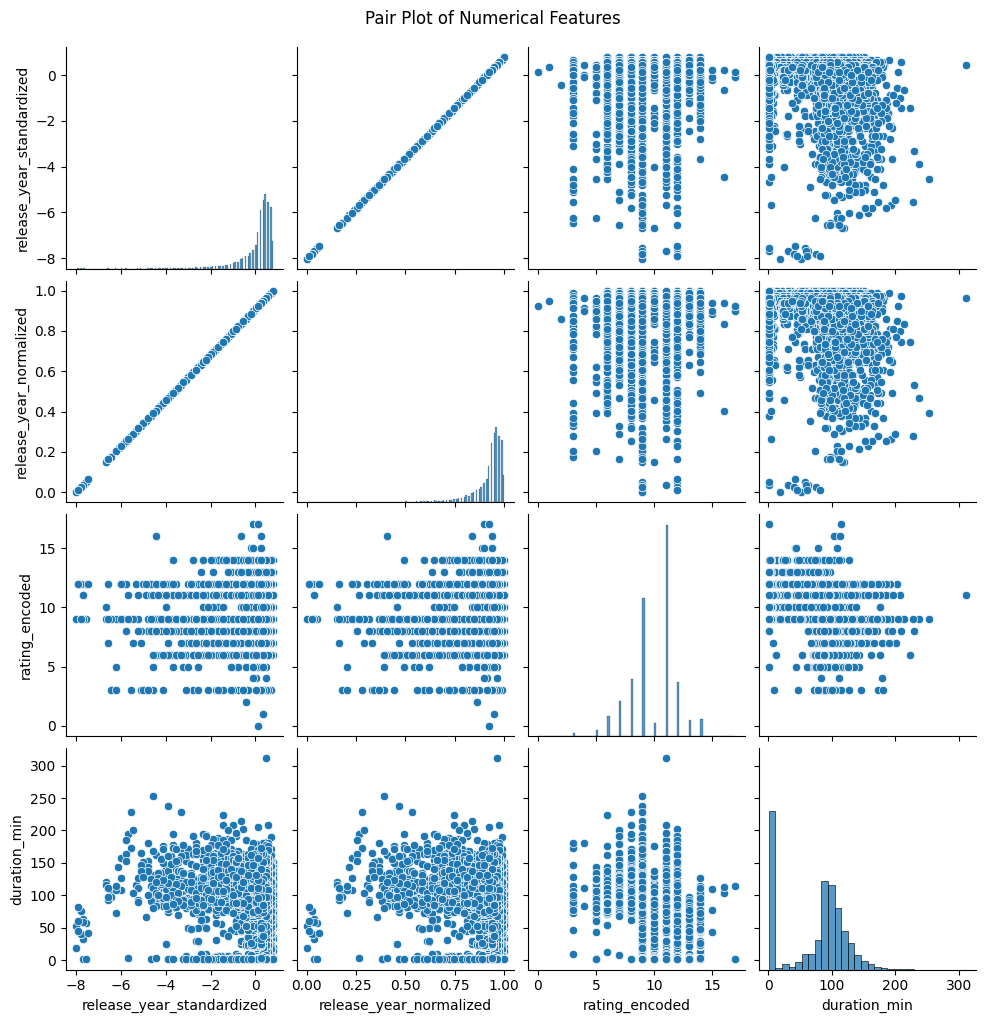

In [74]:
sns.pairplot(df[['release_year_standardized', 'release_year_normalized', 'rating_encoded', 'duration_min']])
plt.suptitle("Pair Plot of Numerical Features", y=1.02)
plt.show()


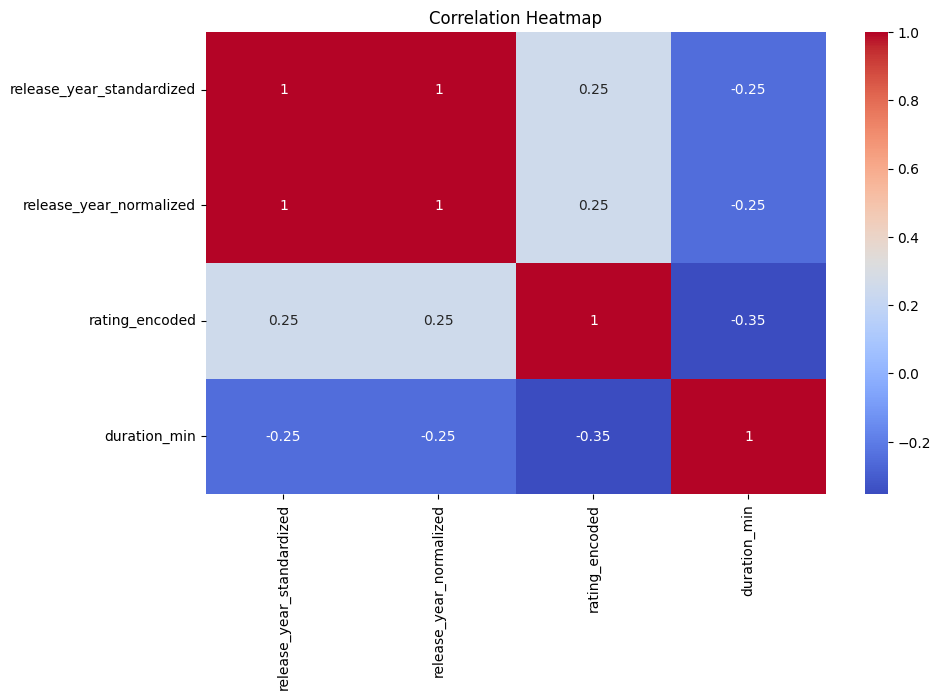

In [75]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[['release_year_standardized', 'release_year_normalized', 'rating_encoded', 'duration_min']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


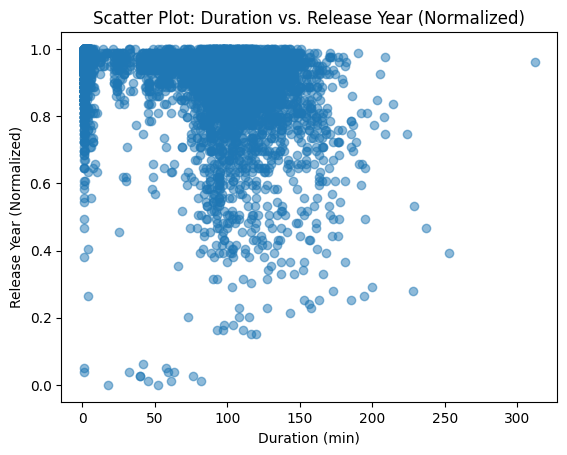

In [76]:
plt.scatter(df['duration_min'], df['release_year_normalized'], alpha=0.5)
plt.title("Scatter Plot: Duration vs. Release Year (Normalized)")
plt.xlabel("Duration (min)")
plt.ylabel("Release Year (Normalized)")
plt.show()


In [77]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

X = df[['release_year_standardized', 'release_year_normalized', 'rating_encoded']]
y = df['duration_min']


In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [79]:
print("Missing values in target variable:", y.isnull().sum())


Missing values in target variable: 3


In [80]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

y = imputer.fit_transform(y.values.reshape(-1, 1)).ravel()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")


Mean Absolute Error (MAE): 38.27


Bonus :- Additonal Exploration


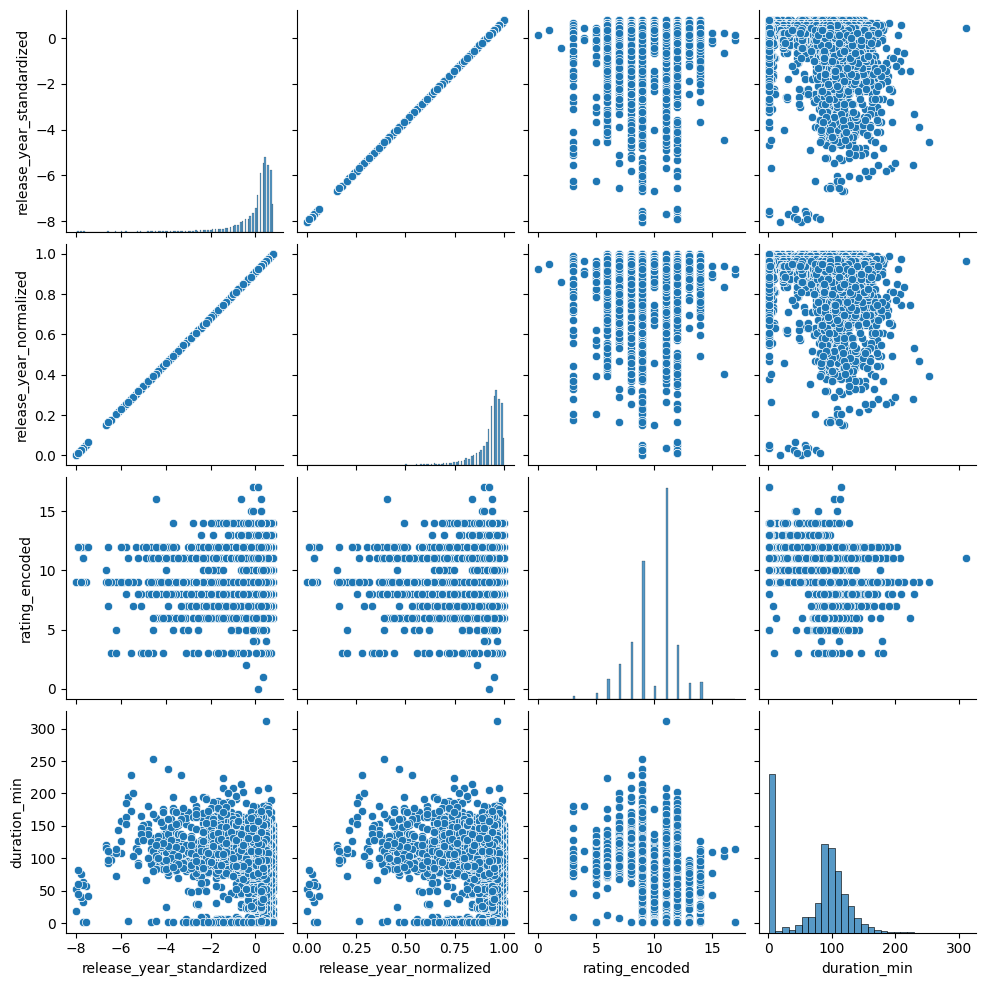

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

features = ['release_year_standardized', 'release_year_normalized', 'rating_encoded', 'duration_min']

sns.pairplot(df[features])
plt.show()


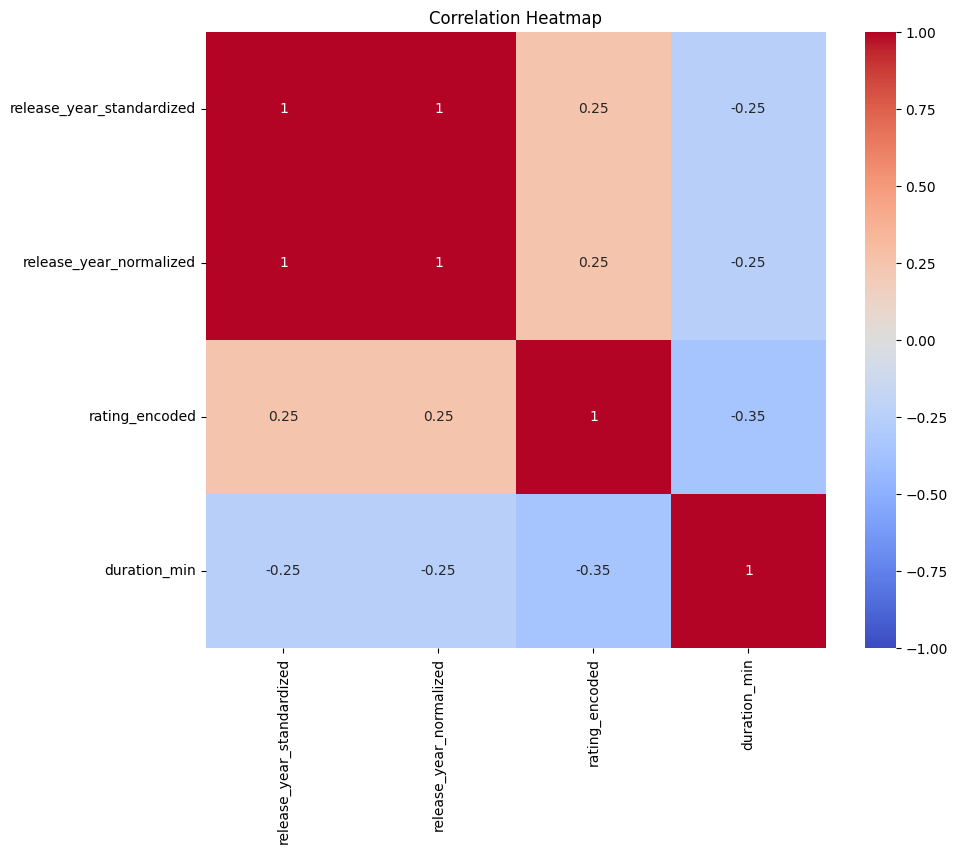

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df[features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


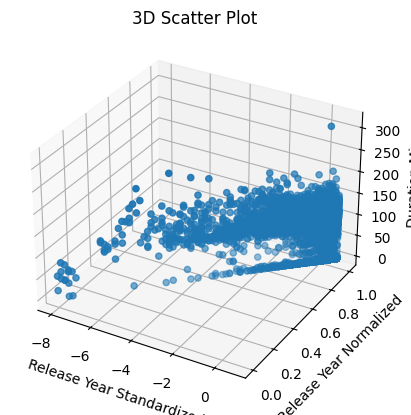

In [83]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['release_year_standardized'], df['release_year_normalized'], df['duration_min'])
ax.set_xlabel('Release Year Standardized')
ax.set_ylabel('Release Year Normalized')
ax.set_zlabel('Duration Min')

plt.title('3D Scatter Plot')
plt.show()


In [84]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)

y_tree_pred = tree_model.predict(X_test)
tree_mae = mean_absolute_error(y_test, y_tree_pred)

print(f"Decision Tree Mean Absolute Error (MAE): {tree_mae:.2f}")


Decision Tree Mean Absolute Error (MAE): 35.87


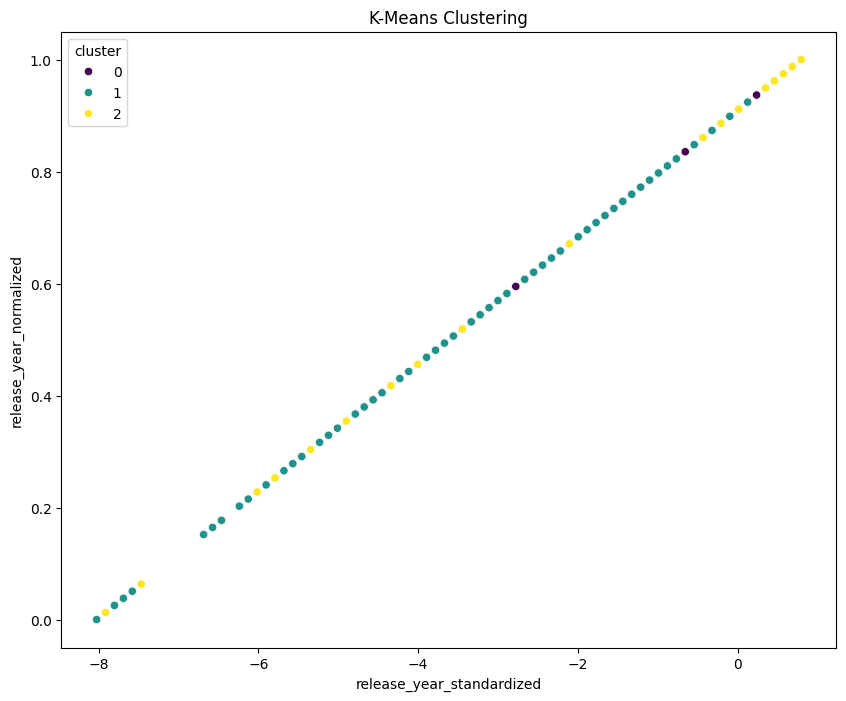

In [85]:
from sklearn.cluster import KMeans
import numpy as np

n_clusters = 3

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

plt.figure(figsize=(10, 8))
sns.scatterplot(x='release_year_standardized', y='release_year_normalized', hue='cluster', data=df, palette='viridis')
plt.title('K-Means Clustering')
plt.show()
